In [1]:
import cv2
import argparse
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#following are the paths to files for input, YOLO configuration file, pre-trained YOLO weights and a text file containing class on which YOLO had been pre-trained
#the model being used here trained on COCO dataset
#model can detect 80 objects and those objects names are in the text file below
input_image_path='C:\\Users\\HP\\Desktop\\7th Semester\\ELL715\\Assignment 3\\Question4\\MalteseDog.JPEG'
config_path='C:\\Users\\HP\\Desktop\\7th Semester\\ELL715\\Assignment 3\\Question4\\yolov3.cfg'
weights_path='C:\\Users\\HP\\Desktop\\7th Semester\\ELL715\\Assignment 3\\Question4\\yolov3.weights'
classes_path='C:\\Users\\HP\\Desktop\\7th Semester\\ELL715\\Assignment 3\\Question4\\yolov3.txt'

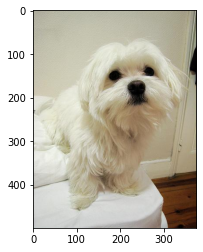

In [3]:
#reading the input image from the path given above
image = cv2.imread(input_image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
#obtaining the width and height of the input image
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

In [5]:
#obtaining the classes and adding them to a list
model_classes = None
with open(classes_path, 'r') as f:
    model_classes = [line.strip() for line in f.readlines()]

#generating different colors for all the classes
COLORS = np.random.uniform(0, 255, size=(len(model_classes), 3))

In [6]:
#reading the configuration and weights files to create a network 
network = cv2.dnn.readNet(weights_path, config_path)

#preparing the input image to run through the dnn
blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

network.setInput(blob)

In [7]:
#proides the names of the multiple output layers of the network
def get_output_layers(net):
    
    layer_names = network.getLayerNames()
    
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers

In [8]:
#drawing rectangles over the detected object region
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(model_classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [9]:
#feed forward through the network happens from this line
outs = network.forward(get_output_layers(network))

class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# for each detetion from each output layer get the confidence, class id, bounding box params and ignore weak detections (confidence < 0.5)
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [10]:
#using non-max suppression to remove boxes which are high overlapping
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

for i in indices:
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

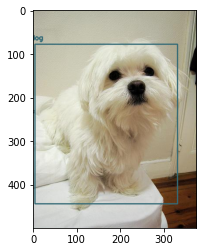

In [11]:
#displaying the output image    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()